# COMANDOS AUXILIARES

## Imports

In [2]:
import seaborn as sns
import pandas  as pd
import numpy   as np
import math

from datetime import datetime

from matplotlib import pyplot as plt

## Funções Auxiliares

In [3]:
# Ajuste do tamanho das imagens
sns.set(rc = {'figure.figsize':(15,8)})

In [4]:
# Função que criará as classes com base nos quilometros percorridos
def create_km_class(km_driven):
    # Cria a categoria a cada 5 mil Km percorridos
    return math.ceil(km_driven / 5000)

In [5]:
# Função que irá criar 
def create_sorted_companies_tuple(dataframe):
    companies = dataframe['company_name'].to_list()
    
    companies_aux = [ company.split(' ') for company in companies ]
    
    companies_aux.sort(key=len, reverse=True)
    
    sorted_companies = [ ' '.join(company) for company in companies_aux ]
    
    return tuple(sorted_companies)

In [6]:
# Função que irá verificar qual a fabricante de cada 
# moto do dataset
def create_company_name(companies, data):
    for company in companies:
        if company in data['name']:
            return company

# KICK OFF DO PROJETO!

## Contexto do Problema de Negócio

A Xtreme Groovy Bikes Sales é uma empresa de revenda de motocicletas. Seu modelo de nogócio é revender motocicletas usadas. Com a crescente do valor dos veículos usados, a XGB Sales, como é conhecida, deseja expandir os seus negócios. Você foi contratado como cientista de dados pela empresa XGB Sales para ajudá-los a encotrar as melhores motocicletas para revenda. 

Para isso, o CEO da empresa fez um estudo de mercado lhe entregou uma base de dados, obtida através desse estudo, para que você consiga auxiliá-lo a encontrar as melhores motocicletas para revenda, aumentando assim o lucro da empresa.

Além disso, o CEO lhe fez algumas perguntas a cerca da base de dados que a empresa possui.
Lembrando que o contexto, pessoas e perguntas são completamente fictícios e existem somente na minha imaginação.

## O Desafio

A empresa XGB Sales lhe contratou como cientista de dados pois ela deseja aumentar o seu lucro comprando e revendendo as melhores motos disponíveis dentro da base de dados que a empresa adquiriu através de um estudo de mercado. 

### Primeira Rodada de Perguntas

Dessa forma, o CEO da XGB Sales lhe fez as seguintes perguntas:

1. Quantas motos temos dentro do Dataset?
2. Qual é o ano da moto mais antiga da base de dados?
3. Qual é o ano da moto mais nova da base de dados?
4. Qual é o valor da moto mais cara da base de dados?
5. Qual é o valor do hodômotro da moto com a maior quilometragem?
6. Qual é o valor do hodômotro da moto com a menor quiilometragem?
7. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o maior valor registrado na base de dados?
8. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o menor valor registrado na base de dados?
9. Quantas motocicletas estão sendo vendidades pelos seus donos e quantas estão sendo vendidas por outros revendedores?
10. Qual é a média de valores das motos na base de dados?
11. Qual é a média de ano das motos cadastradas dentro da base de dados?
12. Qual é a média de quilometragem das motos cadastradas dentro da base de dados?
13. Existem quantas motos dentro da base de dados que são motos de um único dono?
14. As motos com menor quilometragem são as motos mais baratas do Dataset?

### Segunda Rodada de Perguntas

Após analisar as respostas das perguntas anteriores, o CEO da XGB Sales lhe fez mais algumas perguntas:

1. As motos que possuiram somente 1 dono são as motos mais caras na média que as motos que tiveram mais donos?
2. As motos que possuiram mais donos são as motos que possuem quilometragem média maior que as motos que possuiram menos donos?
3. As motos que possuiram mais donos são as motos mais velhas na média?
4. As motos que são vendidas por revendedores são as motos mais caras na média do que as motos vendidas pelos seus donos?
5. O CEO lhe entregou um novo dataset chamado companies.csv, onde estão todas as fabricantes de motocicletas. Adicione uma coluna no DataFrame com o nome de company. Essa coluna deve possuir o nome do fabricante de cada moto do DataFrame.
6. Crie um novo dataset chamado bikes_completed.csv a partir do DataFrame com a coluna company preenchida.
7. Quais são so fabricantes que mais possuem motos cadastradas na base de dados completa?

### Terceira Rodada de Perguntas

Após analisar as respostas das perguntas anteriores, o CEO da XGB Sales lhe fez mais algumas perguntas:

1. Ajustar a coluna `name` para que ela fique somente com o nome da moto.
2. Qual das fabricantes possui o maior preço médio de suas motos?
3. Qual o fabricante que possui a moto com o maior quilometragem?
4. Qual o fabricante que possui a moto mais velha?
5. O fabricante que possui a moto mais cara do Dataset é também o fabricante que possui menos motos cadastradas?
6. Qual o fabricante que possui a menor variação de valor de venda?
7. Quais motos eu devo comprar? 
   - Leve em conta que eu desejo motos com no máximo 3 anos de uso; no máximo 40 mil quilometros rodados; que sejam de um único dono; que estejam sendo vendidas por possoas físicas e que tenham o valor pretendido de venda menor que o valor do showroom. Envie um relatório contendo o modelo, preço de venda, quilometro rodado e ano, ordenado por valor de venda de forma decrescente para o meu e-mail.


## A Base de Dados

O conjunto de dados que representam o contexto está disponível na plataforma do Kaggle. O link para acesso aos dados: [Motorcycle Dataset](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset)

Além disso, eles podem ser encontrados dentro do diretóirio `data` deste projeto.

# Resolução do Desafio

## Carregamento dos dados

In [7]:
df_raw = pd.read_csv('../data/raw/bike.csv')
df_raw.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


## Preparação dos Dados

### Verificação de Tipos

In [8]:
df_raw.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

### Criação da Coluna `id`

In [9]:
df_raw = df_raw.reset_index()
df_raw = df_raw.rename(columns={'index': 'id'})
df_raw.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


### Ajuste do tipo de dados da coluna `selling_price`

In [10]:
# Deixando a coluna ex_showroom_price e selling_price na mesma grandeza
df_raw['selling_price'] = df_raw['selling_price'].astype(float)
df_raw.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN


### Criando a Coluna `age`

In [11]:
df_raw['age'] = df_raw['year'].apply( lambda year: datetime.now().year - year )
df_raw.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12


### Criando a Coluna `km_class`

In [12]:
df_raw['km_class'] = df_raw['km_driven'].apply( lambda km_driven: create_km_class(km_driven) )
df_raw.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5


### Criando a Coluna `km_per_year`

In [13]:
df_raw['km_per_year'] = df_raw.apply( lambda line: round(line['km_driven'] / line['age'], 3), axis=1 )
df_raw.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000


### Criando a Coluna `km_per_month`

In [14]:
df_raw['km_per_month'] = df_raw.apply( lambda line: round(line['km_per_year'] / 12, 3), axis=1 )
df_raw.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500,7.292
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667,78.472
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000,200.000
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000,239.583
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000,145.833


### Criando a coluna `company`

In [15]:
# Lendo o dataset de fabricantes
companies = pd.read_csv('../data/raw/companies.csv', index_col=0)

# Método novo
companies_tuple = create_sorted_companies_tuple(companies)

# Criando a coluna `company` no DataFrame
df_raw['company'] = df_raw.apply(lambda line: create_company_name(companies_tuple, line), axis=1)

df_raw.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500,7.292,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667,78.472,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000,200.000,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000,239.583,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000,145.833,Yamaha


### Descrição das Colunas

| Coluna | Descrição |
| :----- | --------: |
| ID | Identificador da linha/registro |
| name | Fabricante e Modelo da Moto |
| selling_price | Preço de Venda |
| year | Ano de Fabricação da Moto |
| seller_type | Tipo de Vendedor - Se é vendedor pessoal ou revendedor |
| owner | Se é primeiro, segundo, terceiro ou quarto dono da moto |
| km_driven | Quantidade de Quilometros percorrido pela moto |
| ex_showroom_price | Preço da motocicleta sem as taxas de seguro e registro |
| age | Quantidade de anos em que a moto está em uso |
| km_class | Classificação das motos conforme a quilometragem percorrida |
| km_per_year | Quantidade de Quilometros percorridos a cada ano |
| km_per_month | Quantidade de Quilometros percorridos por mês |
| company | Fabricanete da Motocicleta |

## Respondendo as Perguntas

### Primeira Rodada

In [16]:
df1 = df_raw.copy()

#### 1. Quantas motos temos dentro do Dataset?

##### Planejamento

Verificar a quantidade de linhas que existem dentro do dataset

##### Resolução

In [17]:
print(f'A quantidade de motos registradas no Dataset é de {df1.shape[0]} motos')

A quantidade de motos registradas no Dataset é de 1061 motos


#### 2. Qual é o ano da moto mais antiga da base de dados?

##### Planejamento

Verificar qual o menor valor da coluna `year` da base de dados

##### Resolução

In [18]:
antiga = df1[df1['year'] == df1['year'].min()]
antiga

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
468,468,Bajaj Super,20000.0,1988,Individual,1st owner,21000,NaN,35,5,600.0,50.0,Bajaj


In [19]:
print(f'O ano da moto mais antiga é {antiga.iloc[0,3]}')

O ano da moto mais antiga é 1988


#### 3. Qual é o ano da moto mais nova da base de dados?

##### Planejamento

Verificar qual é o maior valor da coluna `year`

##### Resolução

In [20]:
nova = df_raw[df_raw['year'] == df_raw['year'].max()]
nova

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
14,14,Jawa 42,185000.0,2020,Individual,1st owner,1700,NaN,3,1,566.667,47.222,Jawa
101,101,Royal Enfield Classic 350,175000.0,2020,Individual,1st owner,500,NaN,3,1,166.667,13.889,Royal Enfield
136,136,Royal Enfield Classic Gunmetal Grey,190000.0,2020,Individual,1st owner,500,155740.0,3,1,166.667,13.889,Royal Enfield


In [21]:
print(f'O da moto mais nova é {nova.iloc[0, 3]}')

O da moto mais nova é 2020


#### 4. Qual é o valor da moto mais cara da base de dados?

##### Planejamento

Verificar qual é o maior valor da coluna `selling_price`

##### Resposta

In [22]:
cara = df1[df1['selling_price'] == df1['selling_price'].max()]
cara

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
295,295,Suzuki GSX S750,760000.0,2019,Individual,1st owner,2800,752020.0,4,1,700.0,58.333,Suzuki


In [23]:
print(f'O valor da mot mais cara da base de dados é U$ {cara.iloc[0, 2]:.2f}')

O valor da mot mais cara da base de dados é U$ 760000.00


#### 5. Qual é o valor do hodômotro da moto com a maior quilometragem?

##### Planejamento

Verificar qual é o maior valor da coluna `km_driven`

##### Resolução

In [24]:
maior_km = df1[df1['km_driven'] == df1['km_driven'].max()]
maior_km


,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
642,642,TVS Apache RTR 160,15000.0,2009,Individual,4th owner,880000,NaN,14,176,62857.143,5238.095,TVS


In [25]:
print(f'A moto que possui a maior quilometragem da base de dados andou {maior_km.iloc[0, 6]} Km')

A moto que possui a maior quilometragem da base de dados andou 880000 Km


#### 6. Qual é o valor do hodômotro da moto com a menor quiilometragem?

##### Planejamento

Verificar qual é o menor valor da coluna `km_driven`

##### Resposta

In [26]:
menor_km = df1[df1['km_driven'] == df1['km_driven'].min()]
menor_km

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.5,7.292,Royal Enfield


In [27]:
print(f'A moto que possui a menor quilometragem da base de dados andou {menor_km.iloc[0, 6]} Km')

A moto que possui a menor quilometragem da base de dados andou 350 Km


#### 7. Das motos que possuem o valor de venda sem as taxas de registro e seguro, qual seria o maior valor registrado na base de dados para essa coluna?

##### Planejamento

Verificar qual é o maior valor registrado na coluna `ex_showroom_price`

##### Resposta

In [28]:
ex_cara = df1[df1['ex_showroom_price'] == df1['ex_showroom_price'].max()]
ex_cara

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
134,134,Harley-Davidson Street Bob,750000.0,2013,Individual,2nd owner,12000,1278000.0,10,3,1200.0,100.0,Harley-Davidson


In [29]:
print(f'O maior valor da moto sem as taxas de registro e seguro é de U$ {ex_cara.iloc[0, 7]:.2f}')

O maior valor da moto sem as taxas de registro e seguro é de U$ 1278000.00


#### 8. Das motos que que possuem o valor de venda sem as taxas de registro e seguro, qual seria o menor valor registrado na base de dados para essa coluna?

##### Planejamento

Verificar qual é o menor valor registrado na coluna `ex_showroom_price`

##### Resposta

In [30]:
ex_barata = df1[df1['ex_showroom_price'] == df1['ex_showroom_price'].min()]
ex_barata

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
851,851,TVS XL 100,30000.0,2017,Individual,1st owner,8000,30490.0,6,2,1333.333,111.111,TVS


In [31]:
print(f'O maior valor da moto sem as taxas de registro e seguro é de U$ {ex_barata.iloc[0, 7]:.2f}')

O maior valor da moto sem as taxas de registro e seguro é de U$ 30490.00


#### 9. Quantas motocicletas estão sendo vendidades por donos próprio e quantas estão sendo vendidas por revendedores?

##### Planejamento

Contar quantas linhas possuem a coluna `seller_type` preenchida com o conteúdo 'Individual' e quantas estão preenchdidas com o conteúdo 'Dealer'. 

Uma das maneiras de verificar isso é agrupando os dados pela coluna `seller_type` e depois realizar uma contagem nos dados

##### Resposta

In [32]:
df_grouped = df1[['id', 'seller_type']].groupby('seller_type')

df_grouped = df_grouped.count().reset_index()

df_grouped = df_grouped.rename(columns={'id': 'count'})

df_grouped

,seller_type,count
0,Dealer,6
1,Individual,1055


In [33]:
print(f'Dessa forma, temos {df_grouped.loc[0, "count"]} motos sendo vendidas por revendedores')
print(f'E temos {df_grouped.loc[1, "count"]} motos sendo vendidas por seus donos')

Dessa forma, temos 6 motos sendo vendidas por revendedores
E temos 1055 motos sendo vendidas por seus donos


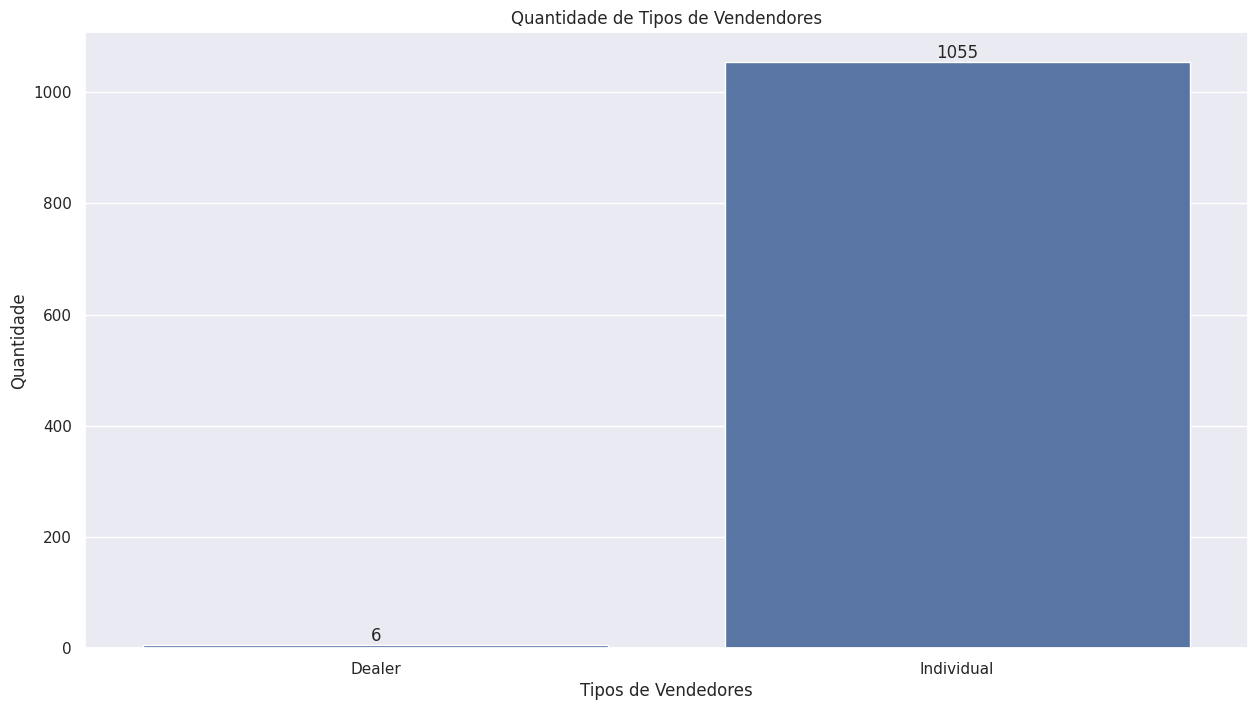

In [34]:
ax = sns.barplot(
    data = df_grouped,
    x = 'seller_type',
    y = 'count'
)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Quantidade de Tipos de Vendendores',
    xlabel = 'Tipos de Vendedores',
    ylabel = 'Quantidade'
);

#### 10. Qual é a média de valores das motos na base de dados?

##### Planejamento

Calcular a média dos valores da coluna `selling_price`. 

Uma maneira de realizar esse cálculo é selecionar os dados da coluna `selling_price` e utilizar a função `mean()`.

##### Resposta

In [35]:
media = df1['selling_price'].mean()
media

59638.151743638075

In [36]:
print(f'O valor média do preço de venda das motos é de U$ {media:.2f}')

O valor média do preço de venda das motos é de U$ 59638.15


#### 11. Qual é a média de ano das motos cadastradas dentro da base de dados?

##### Planejamento

Calcularmos a média dos valores que estão na coluna `year`.

##### Resolução

In [37]:
media_y = df1['year'].mean()
media_y

2013.8671065032988

In [38]:
print(f'A média do ano das motos da base de dados é {media_y:.0f}')

A média do ano das motos da base de dados é 2014


#### 12. Qual é a média de quilometragem das motos cadastradas dentro da base de dados?

##### Planejamento

Calcular a média dos valores da coluna `km_driven`

##### Resposta

In [39]:
media_km = df1['km_driven'].mean()
media_km

34359.83317624882

In [40]:
print(f'A média de quilometros percorridos das motos da base de dados é de {media_km:.2f} Km')

A média de quilometros percorridos das motos da base de dados é de 34359.83 Km


#### 13. Existem quantas motos dentro da base de dados que são motos de um único dono?

##### Planejamento

Selecionar as linhas que possuem a coluna `owner` igual `1st owner` e depois fazer a contagem da quantidade de linhas

##### Resposta

In [41]:
unico_dono = df1[df1['owner'] == '1st owner'].shape[0]
unico_dono

924

In [42]:
print(f'A base de dados possui {unico_dono} motos de um único dono')

A base de dados possui 924 motos de um único dono


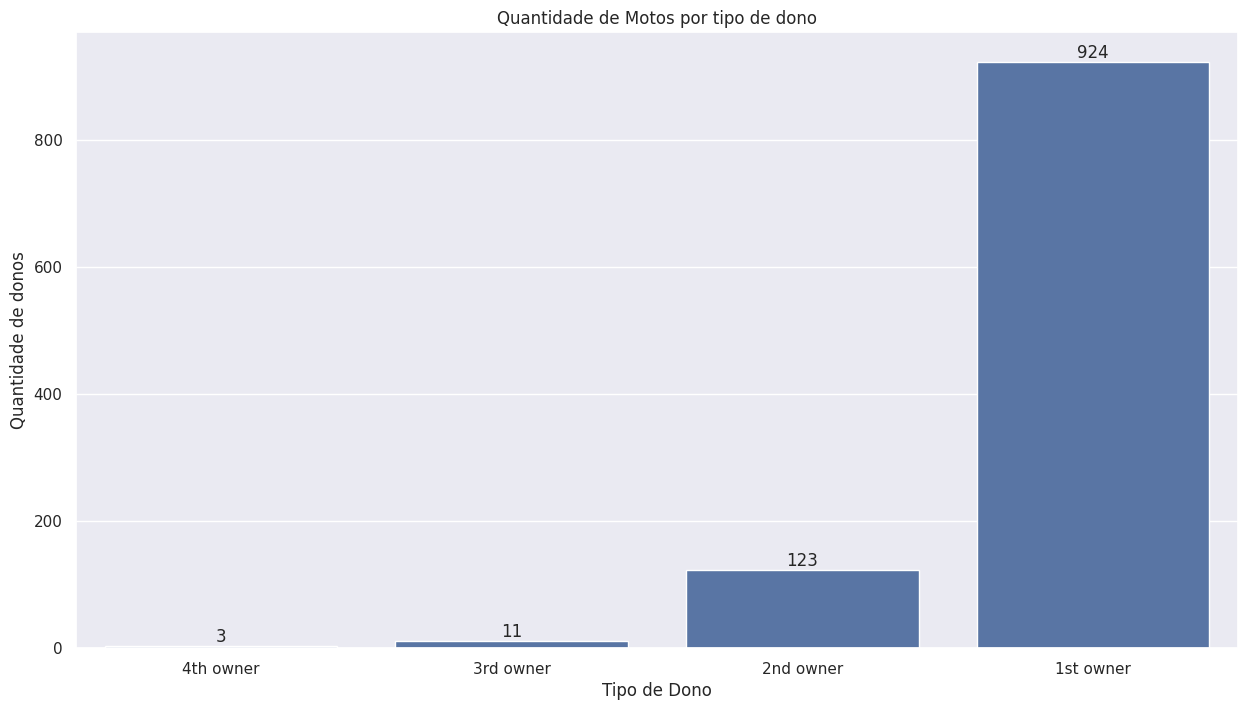

In [43]:
df_grouped = df1.groupby('owner').agg(
    qty = pd.NamedAgg('id', 'count')
).sort_values('qty').reset_index()

ax = sns.barplot(
    data=df_grouped,
    x = 'owner',
    y = 'qty'
)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Quantidade de Motos por tipo de dono',
    xlabel = 'Tipo de Dono',
    ylabel = 'Quantidade de donos'
);

#### 14. As motos com maior quilometragem são as motos mais baratas do Dataset?

##### Planejamento

Categorizar as motos conforme a quantidade de quilometros percorridos. 

A cada 5 mil quilometros será criada uma nova categoria. E depois, será agrupado as categorias e calculado a média de cada categoria, para verificar qual é a categoria que tem a menor média de valor.

##### Resposta

In [44]:
df1.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500,7.292,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667,78.472,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000,200.000,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000,239.583,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000,145.833,Yamaha


In [45]:
# Aplica a classificação das motocicletas
df1['km_class'] = df1['km_driven'].apply( lambda km_driven: create_km_class(km_driven) )
df1.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500,7.292,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667,78.472,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000,200.000,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000,239.583,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000,145.833,Yamaha


In [46]:
# Quantidade de classes no Dataset
len(df1['km_class'].unique())

32

In [47]:
df_grouped = df1[['km_class', 'selling_price']].groupby('km_class')

df_grouped = df_grouped.mean().sort_values('selling_price', ascending=False).reset_index()

df_grouped.head()

,km_class,selling_price
0,1,124564.705882
1,69,120000.000000
2,2,87146.448000
3,3,79736.842105
4,48,70000.000000


Como podemos observar, as motos com maior quilometragem não são as mais baratas na média. Visto que a maior classificação com relação à quilometragem percorrida é de 177.

[Text(0.5, 1.0, 'Média de Preço das Motocicletas agrupadas por classe'),
 Text(0.5, 0, 'Classe de Quilemtros percorridos (5 mil Km percorrido por classe)'),
 Text(0, 0.5, 'Preço Médio de venda')]

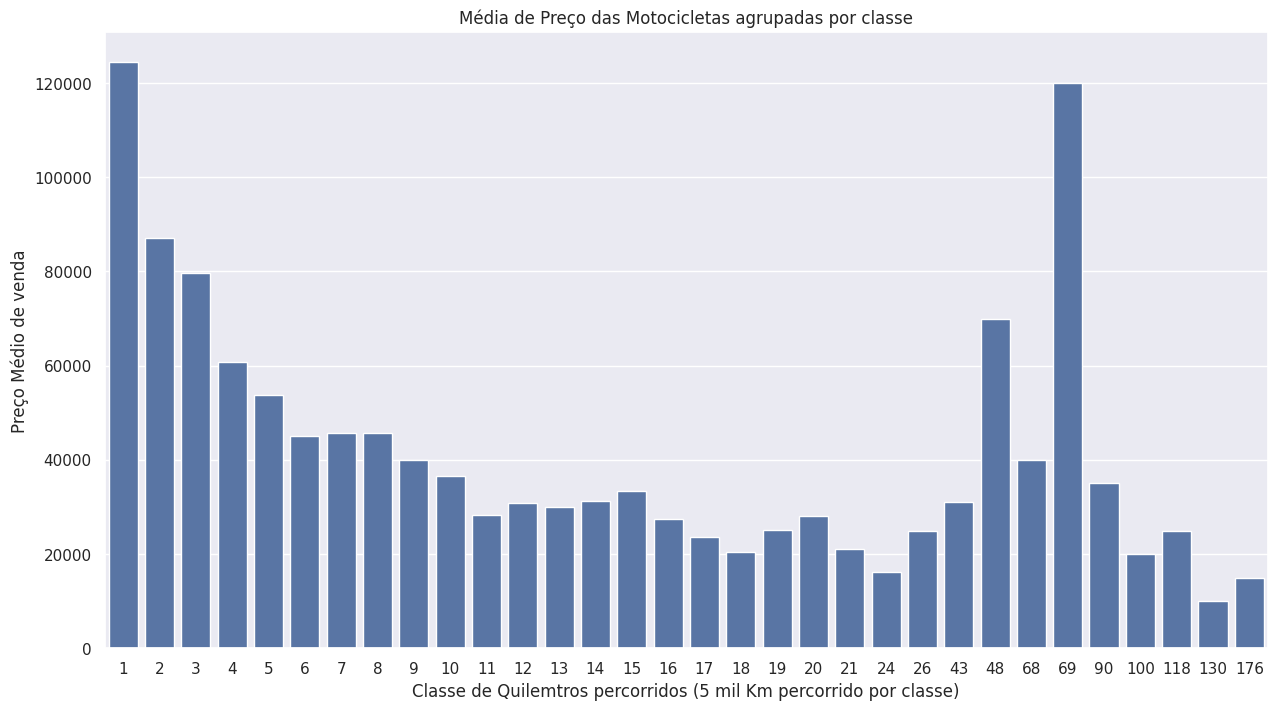

In [48]:
ax = sns.barplot(
    data = df_grouped,
    x = 'km_class',
    y = 'selling_price'
)

ax.set(
    title = 'Média de Preço das Motocicletas agrupadas por classe',
    xlabel = 'Classe de Quilemtros percorridos (5 mil Km percorrido por classe)',
    ylabel = 'Preço Médio de venda'
)

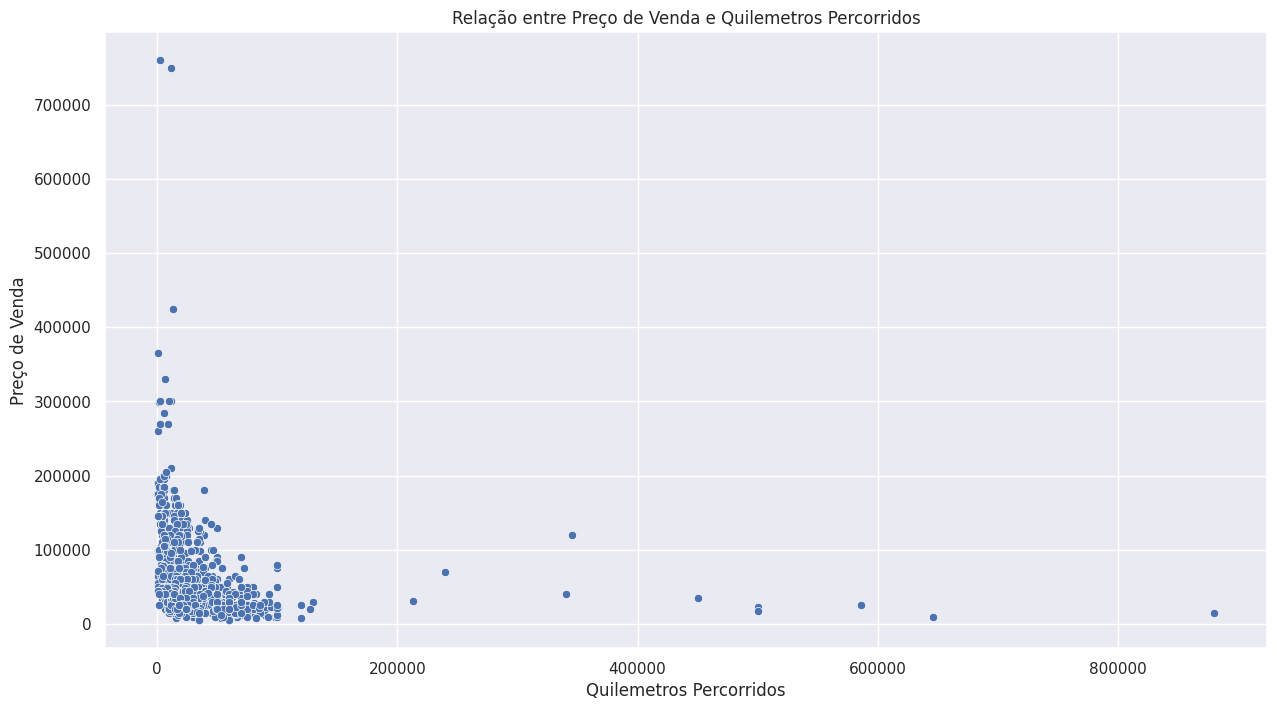

In [49]:
ax = sns.scatterplot(
    data = df1,
    x = 'km_driven',
    y = 'selling_price',
)

ax.set(
    title = 'Relação entre Preço de Venda e Quilemetros Percorridos',
    xlabel = 'Quilemetros Percorridos',
    ylabel = 'Preço de Venda'
);

In [50]:
print(f'Conforme podemos observar em ambos os gráficos, as motos que possuem mais quilometragem percorrida, são as mais baratas')

Conforme podemos observar em ambos os gráficos, as motos que possuem mais quilometragem percorrida, são as mais baratas


### Segunda Rodada

#### 1. As motos que possuiram somente 1 dono são as motos mais caras na média que as motos que tiveram mais donos?

##### Planejamento

Agupar os dados por categoria de quantidade de donos, coluna `owner` e tirar a média dos valores de preço de venda para verificar qual é a categoria que possuí a maior média

##### Resposta

In [51]:
df_grouped = df1.groupby('owner')

df_grouped = df_grouped.agg(
    avg_price = pd.NamedAgg('selling_price', 'mean'),
    qty = pd.NamedAgg('owner', 'count'),
).sort_values('avg_price', ascending=False).reset_index()

df_grouped['avg_price'] = df_grouped['avg_price'].round(2)

df_grouped

,owner,avg_price,qty
0,4th owner,118333.33,3
1,1st owner,60022.81,924
2,3rd owner,55727.27,11
3,2nd owner,55666.66,123


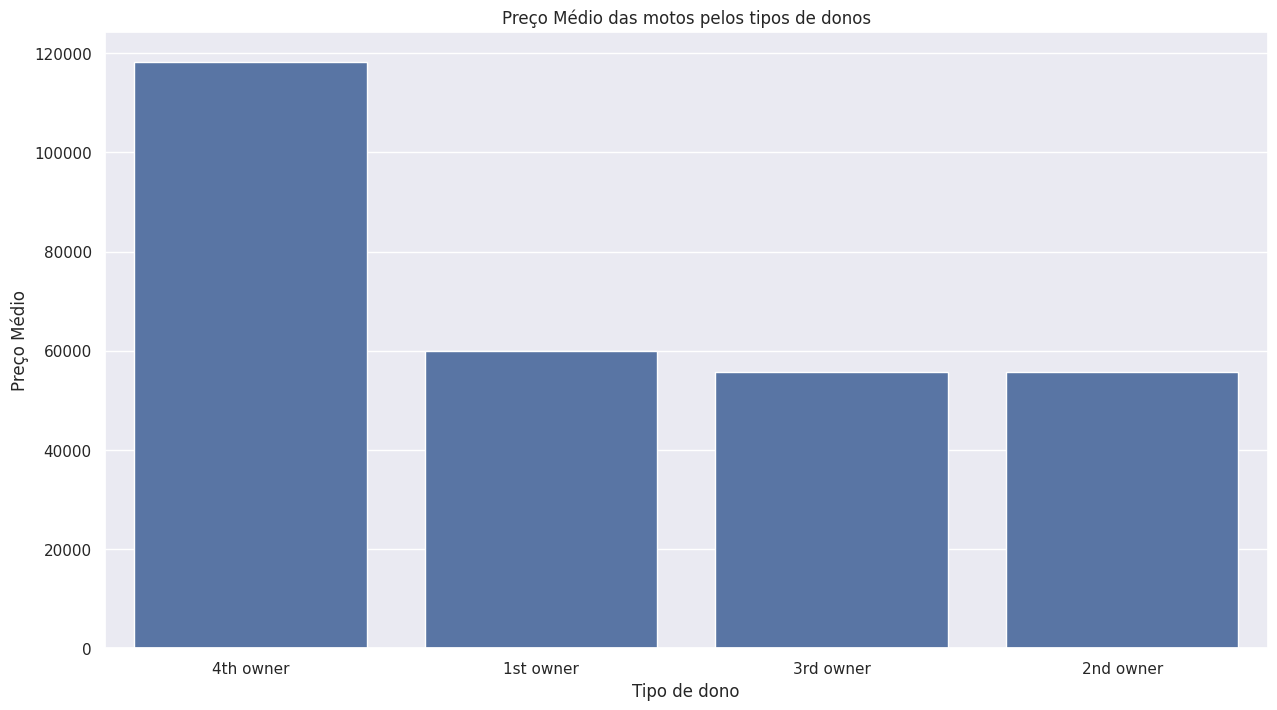

In [52]:
ax = sns.barplot(
    data = df_grouped,
    x = 'owner',
    y = 'avg_price',
)

ax.set(
    title = 'Preço Médio das motos pelos tipos de donos',
    xlabel = 'Tipo de dono',
    ylabel = 'Preço Médio'
);

Como podemos observar, na média, as motos mais caras são as motos que tiveram 4 donos.

#### 2. As motos que possuiram mais donos são as motos que possuem quilometragem média maior que as motos que possuiram menos donos?

##### Planejamento

Agrupar os dados por quantidade de donos e calcular a média de quilometros percorridos por cada categoria

##### Resposta

In [53]:
df_grouped = df1[['owner', 'km_driven']].groupby('owner')

df_grouped = df_grouped.mean().sort_values('km_driven', ascending=False).reset_index()

df_grouped

,owner,km_driven
0,4th owner,311500.000000
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,1st owner,32816.583333


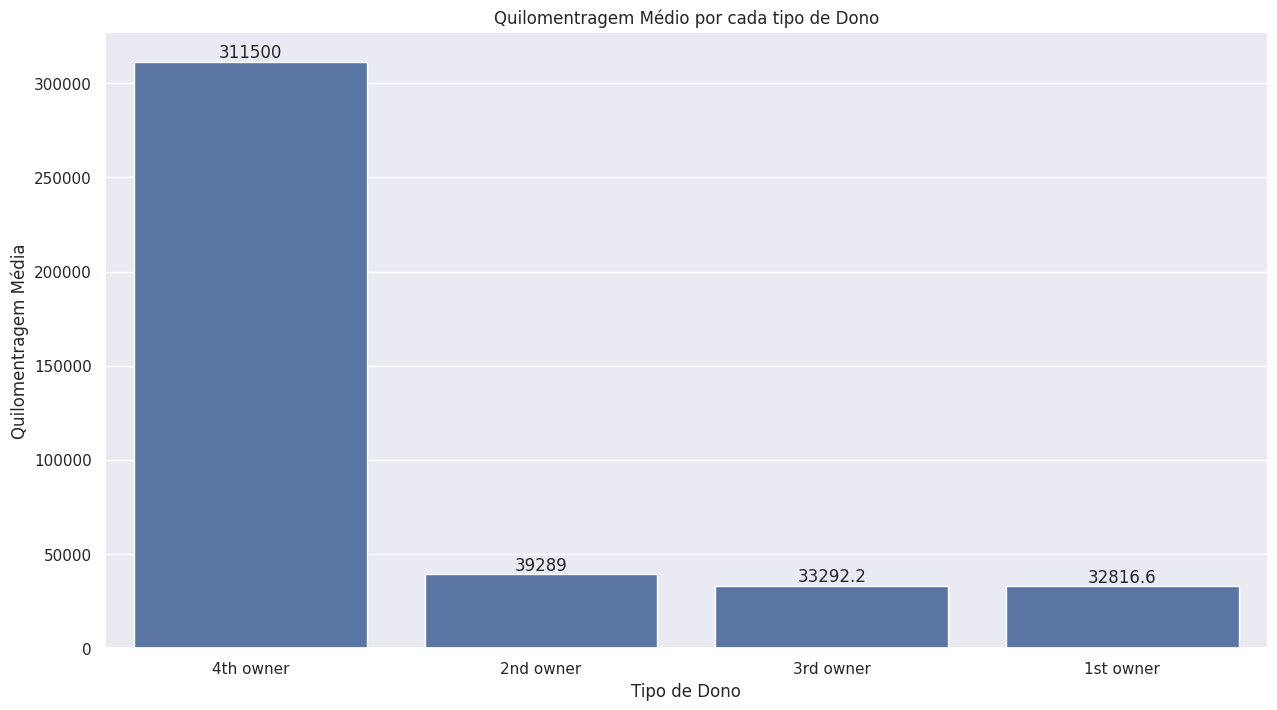

In [54]:
ax = sns.barplot(
    data = df_grouped,
    x = 'owner',
    y = 'km_driven'
)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Quilomentragem Médio por cada tipo de Dono',
    xlabel = 'Tipo de Dono',
    ylabel = 'Quilomentragem Média'
);

Como podemos observar, na média as motos que possuíram mais donos são as motos com maior quilemetragem percorrida

#### 3. As motos que possuiram mais donos são as motos mais velhas na média?

##### Planejamento

__Passos:__
1. Criar a coluna chamada `age` que terá como conteúdo a idade de cada moto. 
2. Agrupar as motos pelo tipo de dono e calcular a média de idade para cada tipo de dono.

##### Resposta

In [55]:
df_grouped = df1[['owner', 'age']].groupby('owner')

df_grouped = df_grouped.mean().sort_values('age', ascending=False).reset_index()

df_grouped['age'] = df_grouped['age'].astype(int)

df_grouped

,owner,age
0,4th owner,15
1,3rd owner,15
2,2nd owner,10
3,1st owner,8


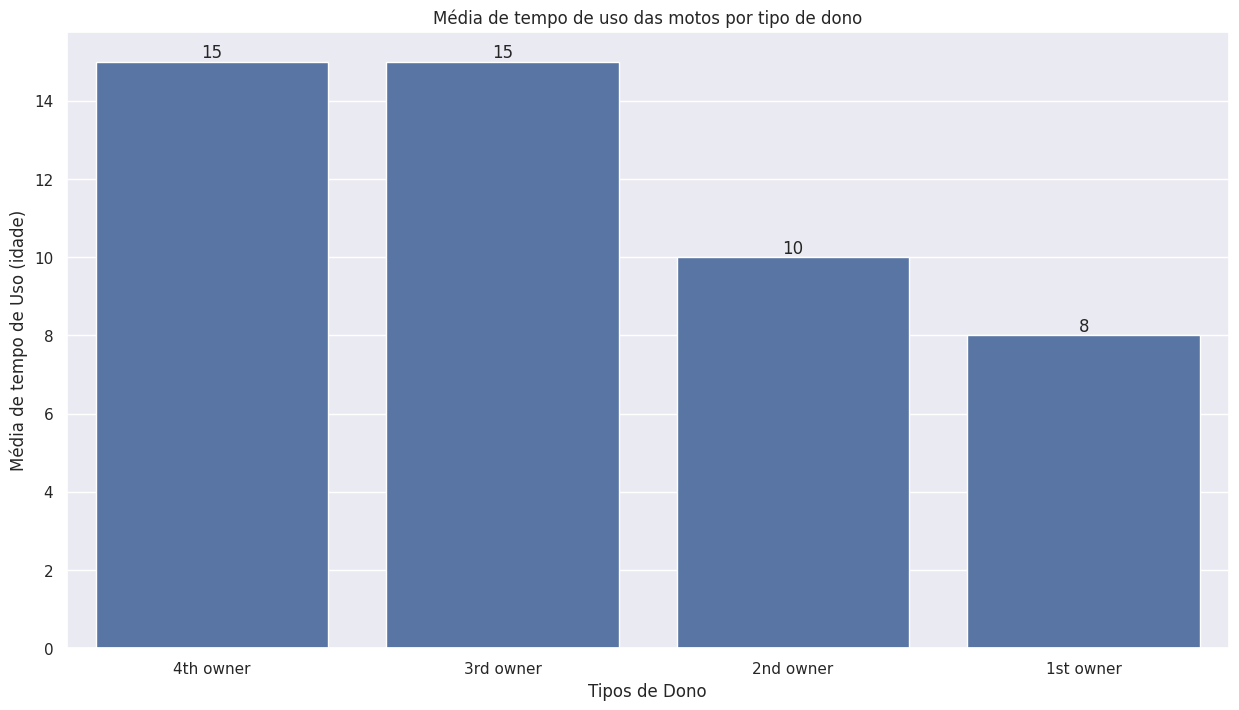

In [56]:
ax = sns.barplot(
    data = df_grouped,
    x = 'owner',
    y = 'age'
)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Média de tempo de uso das motos por tipo de dono',
    xlabel = 'Tipos de Dono',
    ylabel = 'Média de tempo de Uso (idade)'
);

Como podemos observar, as motos que possuiram mais donos são sim as motos com maior idade média dentro da base de dados.

#### 4. As motos que são vendidas por revendedores são as motos mais caras na média do que as motos vendidas pelos seus donos?

##### Planejamento

Agrupar os dados pelos tipos de vendedores e calcular a média do preço de venda por tipo de vendedor

##### Resposta

In [57]:
df_grouped = df1[['seller_type', 'selling_price']].groupby('seller_type')

df_grouped = df_grouped.agg(
    avg_price = pd.NamedAgg('selling_price', 'mean'),
    median_price = pd.NamedAgg('selling_price', 'median'),
    std_price = pd.NamedAgg('selling_price', 'std'),
    qty = pd.NamedAgg('seller_type', 'count'),
).sort_values('avg_price', ascending=False).reset_index()

df_grouped

,seller_type,avg_price,median_price,std_price,qty
0,Individual,59711.923223,45000.0,56427.961672,1055
1,Dealer,46666.666667,44000.0,25734.542286,6


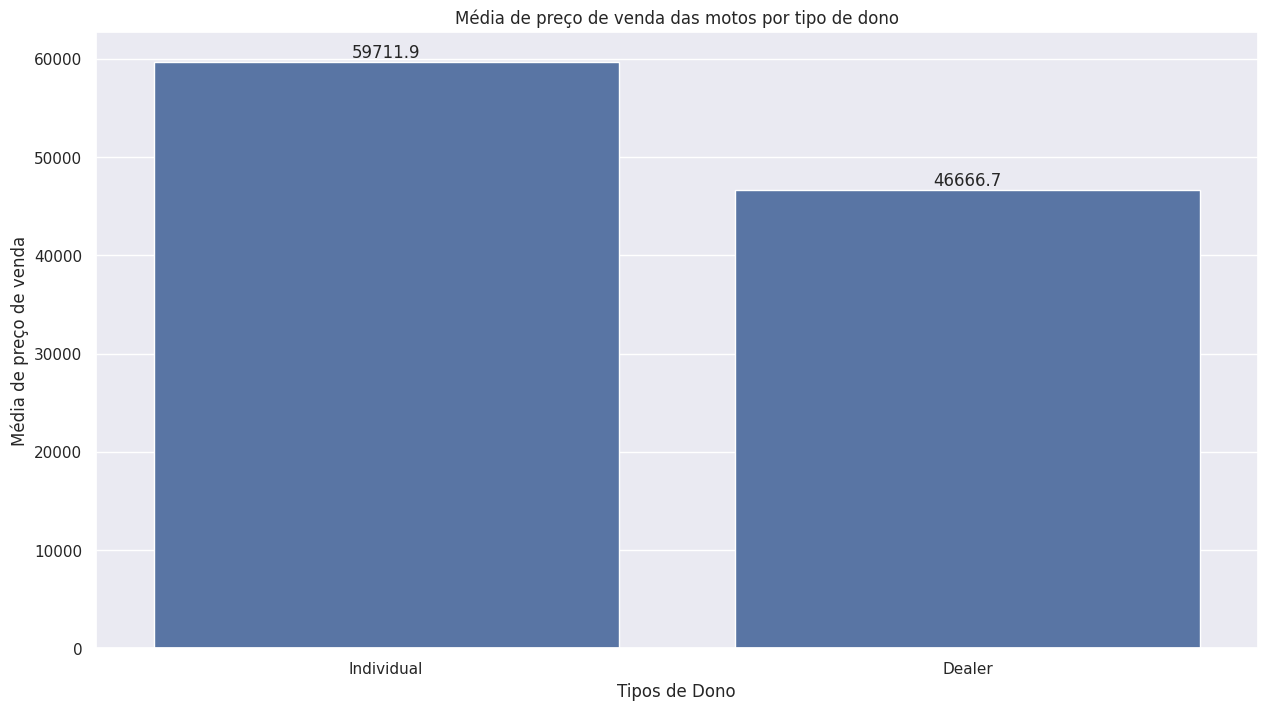

In [58]:
ax = sns.barplot(
    data = df_grouped,
    x = 'seller_type',
    y = 'avg_price'
)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Média de preço de venda das motos por tipo de dono',
    xlabel = 'Tipos de Dono',
    ylabel = 'Média de preço de venda'
);

Como podemos observar, as motos que são revendidas pelos seus donos são as mais caras na média.

#### 5. O CEO lhe entregou um novo dataset chamado `companies.csv`, onde estão todas as fabricantes de motocicletas. Adicione uma coluna no DataFrame com o nome de `company`. Essa coluna deve possuir o nome do fabricante de cada moto do DataFrame.

##### Planejamento

__Passos:__
1. O novo dataset está dentro do diretório **data/raw** com o nome `companies.csv`. 
2. Fazer a leitura do arquivo e guardar as infomações dentro de um DataFrame.
3. Percorrer os dados do DataFrame de motos e verificar no DataFrame de fabricantes qual é o fabricante da motocicleta em questão
    1. Preencher a coluna `company` com o nome do fabricante encontrado.

##### Resposta

Processo já realizado na preparação dos dados

#### 6. Crie um novo dataset chamado `bikes_completed.csv` a partir do DataFrame com a coluna company preenchida.

##### Planejamento

__Passos:__
1. Criar um novo Dataset chamado `bikes_completed` utilizando a função `df.to_csv()` a partir do DataFrame criado na questão anterior
2. Salvar o arquivo criado dentro do diretório `data/processed`

##### Resposta

In [59]:
df1.to_csv('../data/processed/bikes_completed.csv', index=False)

#### 7. Quais são so fabricantes que mais possuem motos cadastradas na base de dados completa?

##### Planejamento

Agrupar os dados pelos fabricantes e contar a quantidade de dados que cada fabricante possui

##### Resposta

In [60]:
df1.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
0,0,Royal Enfield Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500,7.292,Royal Enfield
1,1,Honda Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667,78.472,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000,200.000,Royal Enfield
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000,239.583,Yamaha
4,4,Yamaha SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000,145.833,Yamaha


In [61]:
df_grouped = df1.loc[:, ['company', 'id']].groupby('company')

df_grouped = df_grouped.count().sort_values('id', ascending=False).reset_index()

df_grouped

,company,id
0,Bajaj,260
1,Honda,204
2,Hero,144
3,Royal Enfield,109
4,Yamaha,102
5,Hero Honda,88
6,TVS,69
7,Suzuki,30
8,KTM,24
9,Mahindra,6


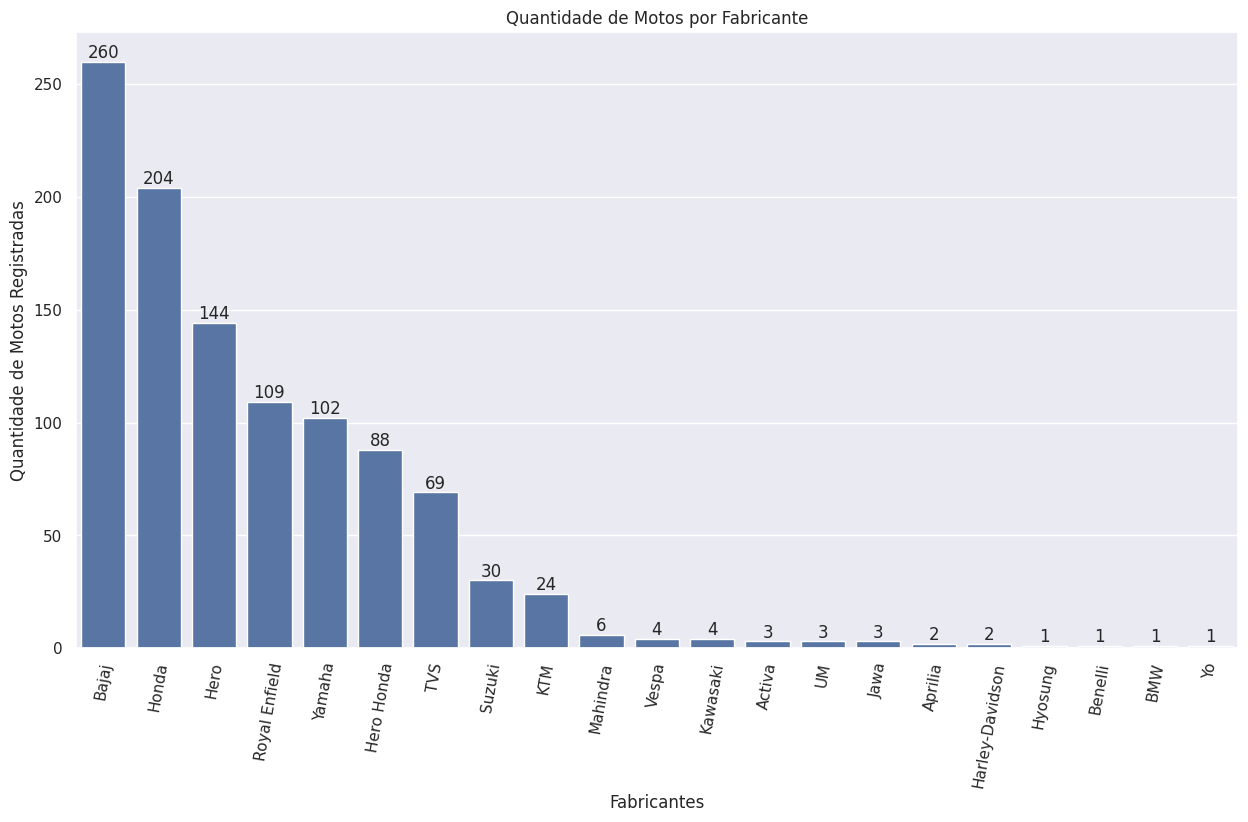

In [62]:
ax = sns.barplot(
    data = df_grouped,
    x = 'company',
    y = 'id'
)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Quantidade de Motos por Fabricante',
    xlabel = 'Fabricantes',
    ylabel = 'Quantidade de Motos Registradas'
)

plt.xticks(rotation = 80);

Como podemos observar, a fabricante que mais possui motos cadastradas na base de dados é a Bajaj

### Terceira Rodada

#### 1. Ajustar a coluna `name` para que ela fique somente com o nome da moto.

##### Planejamento

__Passos:__
1. Todos os registros da coluna `name` iniciam com os nomes dos seus respectivos fabricantes.
2. Percorrer todos os dados e substituir o nome do fabricante por nenhum caractere

##### Resposta

In [63]:
df1['name'] = df1.apply(lambda line: line['name'].replace(f"{line['company']} ", ''), axis=1)

df1.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,km_class,km_per_year,km_per_month,company
0,0,Classic 350,175000.0,2019,Individual,1st owner,350,NaN,4,1,87.500,7.292,Royal Enfield
1,1,Dio,45000.0,2017,Individual,1st owner,5650,NaN,6,2,941.667,78.472,Honda
2,2,Classic Gunmetal Grey,150000.0,2018,Individual,1st owner,12000,148114.0,5,3,2400.000,200.000,Royal Enfield
3,3,Fazer FI V 2.0 [2016-2018],65000.0,2015,Individual,1st owner,23000,89643.0,8,5,2875.000,239.583,Yamaha
4,4,SZ [2013-2014],20000.0,2011,Individual,2nd owner,21000,NaN,12,5,1750.000,145.833,Yamaha


#### 2. Qual das fabricantes possui o maior preço médio de suas motos?

##### Planejamento

Agrupar os dados por fabricante e calcular a média do preço de revenda de cada fabricante

##### Resposta

In [64]:
df_grouped = df1[['company', 'selling_price']].groupby('company')

df_grouped = df_grouped.agg(
    avg_price = pd.NamedAgg('selling_price', 'mean'),
    median_price = pd.NamedAgg('selling_price', 'median'),
    std_price = pd.NamedAgg('selling_price', 'std'),
    qty = pd.NamedAgg('company', 'count'),
).sort_values('avg_price', ascending=False).reset_index()

df_grouped

,company,avg_price,median_price,std_price,qty
0,Harley-Davidson,540000.000000,540000.0,296984.848098,2
1,BMW,300000.000000,300000.0,NaN,1
2,Kawasaki,287500.000000,300000.0,123322.071558,4
3,Jawa,175000.000000,180000.0,13228.756555,3
4,Benelli,160000.000000,160000.0,NaN,1
5,UM,156666.666667,160000.0,15275.252317,3
6,KTM,155708.333333,142500.0,41560.306279,24
7,Hyosung,135000.000000,135000.0,NaN,1
8,Royal Enfield,128549.541284,123000.0,42971.124292,109
9,Suzuki,73800.000000,45000.0,131871.515316,30


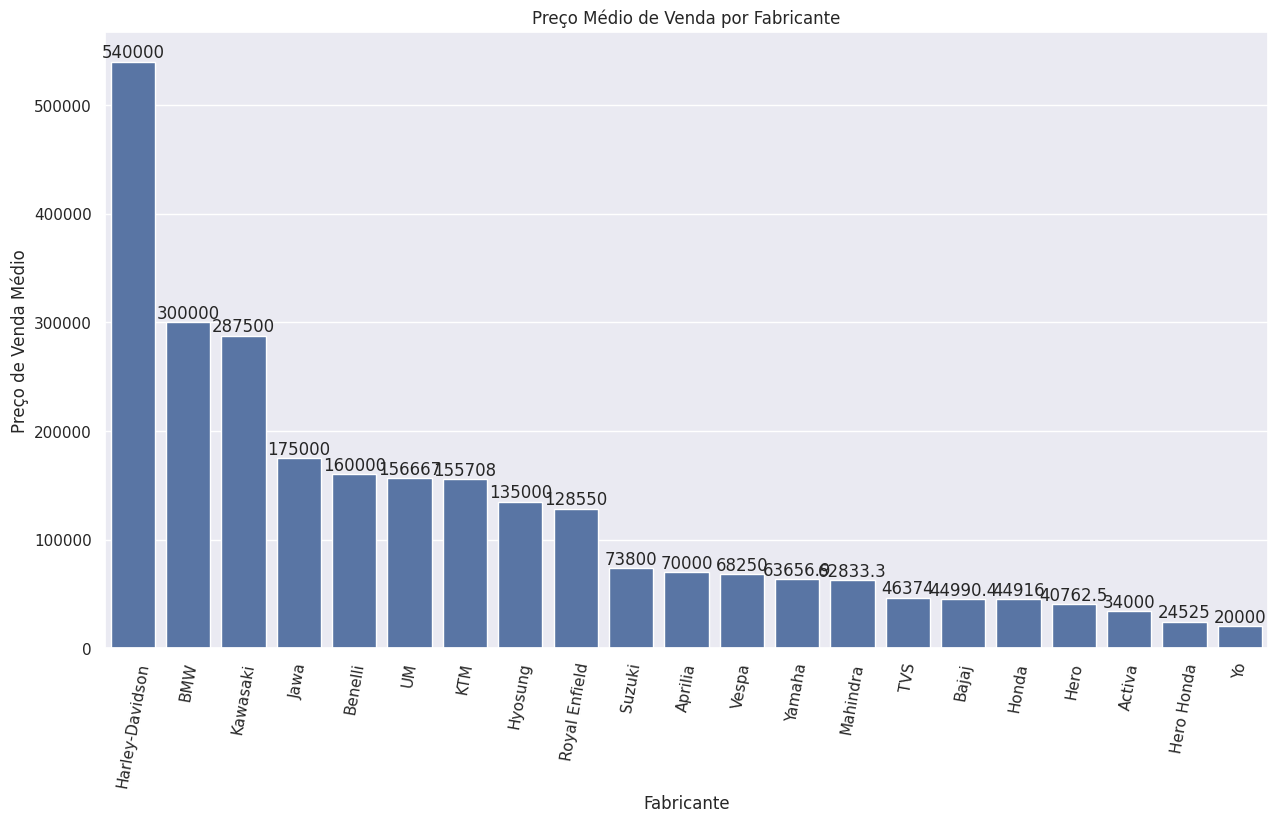

In [65]:
ax = sns.barplot(
    data = df_grouped,
    x = 'company',
    y = 'avg_price'
)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Preço Médio de Venda por Fabricante',
    xlabel = 'Fabricante',
    ylabel = 'Preço de Venda Médio'
)

plt.xticks(rotation = 80);

Como podemos observar, a fabricante que possui as motos com o maior valor médio para venda é a Harley-Davidson

#### 3. Qual o fabricante que possui a moto com o maior quilometragem?

##### Planejamento

Agrupar os dados pela coluna de fabricante e verificar qual é o registro que possuí o maior valor de quilometragem percorrido

##### Resposta

In [66]:
df_grouped = df1[['company', 'km_driven']].groupby('company')

df_grouped = df_grouped.agg(
    avg_km_driven = pd.NamedAgg('km_driven', 'mean'),
    median_km_driven = pd.NamedAgg('km_driven', 'median'),
    std_km_driven = pd.NamedAgg('km_driven', 'std'),
    qty = pd.NamedAgg('company', 'count'),
).sort_values('avg_km_driven', ascending=False).reset_index()

df_grouped

,company,avg_km_driven,median_km_driven,std_km_driven,qty
0,Activa,167266.666667,1300.0,288155.796980,3
1,Hero Honda,60947.511364,49937.5,74767.910682,88
2,TVS,42008.318841,22000.0,104785.464235,69
3,Honda,36745.235294,25000.0,58314.203203,204
4,Hero,34172.187500,26000.0,41079.224626,144
5,Bajaj,33786.126923,30000.0,21387.191339,260
6,Yamaha,28281.862745,23000.0,23003.670574,102
7,Suzuki,22194.600000,15000.0,24011.389373,30
8,Royal Enfield,20732.935780,15000.0,34131.866124,109
9,Vespa,18428.000000,11356.0,22445.997074,4


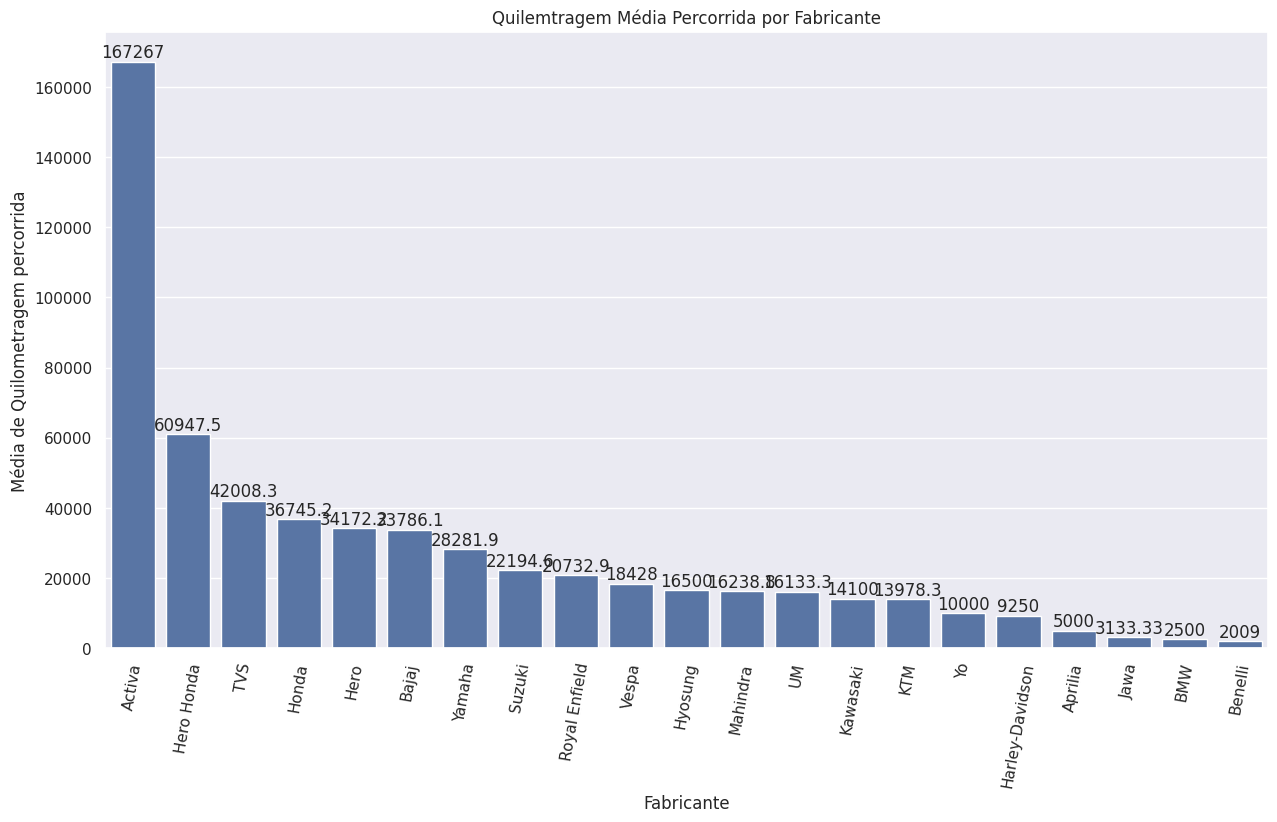

In [67]:
ax = sns.barplot(
    data = df_grouped,
    x = 'company',
    y = 'avg_km_driven'
)

ax.bar_label(ax.containers[0])

ax.set(
    title = 'Quilemtragem Média Percorrida por Fabricante',
    xlabel = 'Fabricante',
    ylabel = 'Média de Quilometragem percorrida'
)

plt.xticks(rotation = 80);

Como podemos observar, a fabricante `Activia` é a que possui a moto com a maior distância percorrida na base de dados

#### 4. Qual o fabricante que possui a moto mais velha?

##### Planejamento

Agrupar os dados por fabricante e verificar o registro que possui o menor ano de fabricação

##### Resposta

In [68]:
df_grouped = df1[['year', 'company']].groupby('company')

df_grouped = df_grouped.min().sort_values('year', ascending=False).reset_index()

df_grouped

,company,year
0,Jawa,2019
1,BMW,2018
2,Aprilia,2018
3,Benelli,2017
4,UM,2017
5,Hyosung,2016
6,Vespa,2013
7,Harley-Davidson,2013
8,KTM,2013
9,Yo,2011


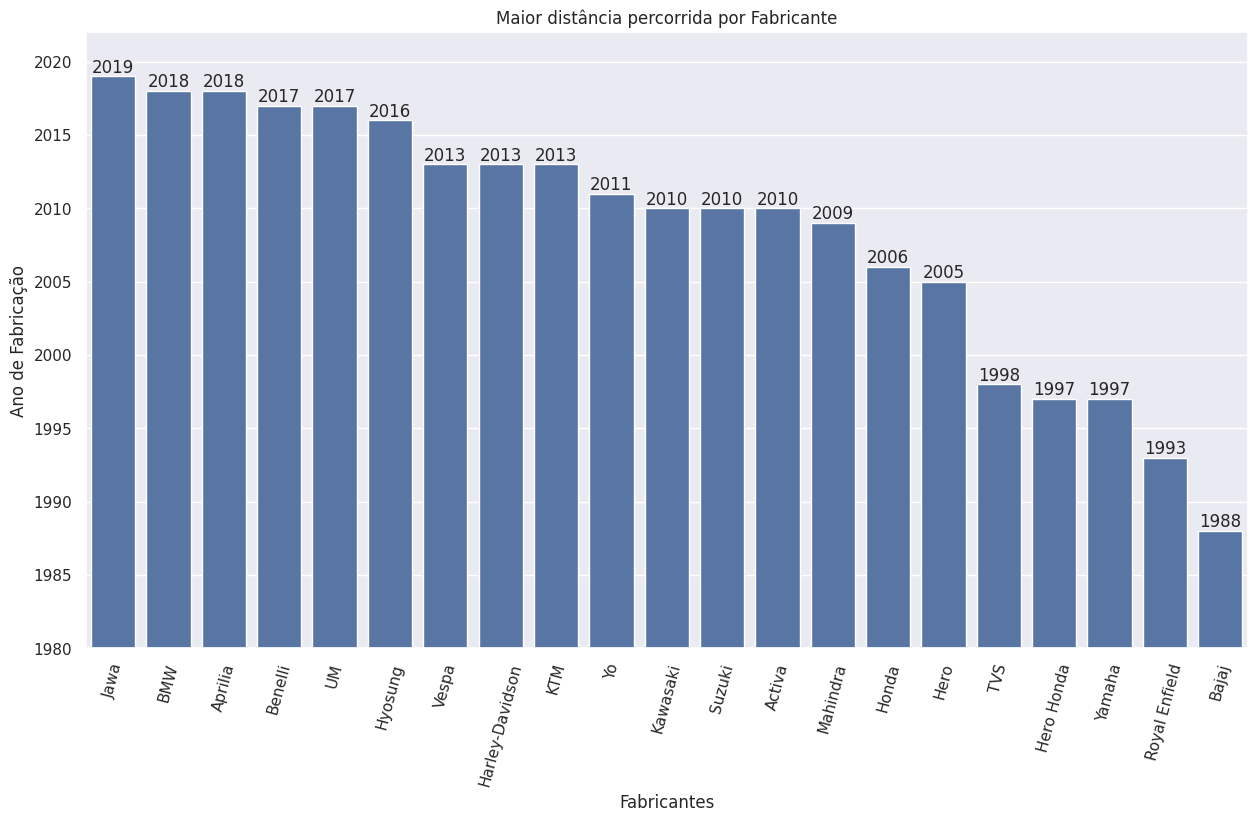

In [69]:
ax = sns.barplot(
    data=df_grouped, 
    x='company', 
    y='year'
)

ax.bar_label(ax.containers[0])

ax.set(
    xlabel='Fabricantes', 
    ylabel='Ano de Fabricação', 
    title='Maior distância percorrida por Fabricante', 
    ylim=[1980, 2022]
)

plt.xticks(rotation=75);

Como podemos observar, a fabricante que possui a moto mais antiga na base de dados é a fabricante `Bajaj`

#### 5. O fabricante que possui a moto mais cara do Dataset é também o fabricante que possui menos motos cadastradas?

##### Planejamento

__Passos:__
1. Agrupar os dados por fabricante. 
2. Selecionar as informações de preço de venda e de identificação. 
    1. Na coluna de preço de venda, verificar o valor mais caro
    2. Na coluna de identificação, realizar a contagem.

##### Resposta

In [70]:
df_grouped = df1[['id', 'selling_price', 'company']].groupby('company')

df_grouped = df_grouped.agg(
    max_selling_price = pd.NamedAgg('selling_price', 'max'),
    quantity = pd.NamedAgg('id', 'count'),
)

df_grouped = df_grouped.reset_index().sort_values('max_selling_price', ascending=False)

df_grouped.head()

,company,max_selling_price,quantity
15,Suzuki,760000.0,30
5,Harley-Davidson,750000.0,2
12,Kawasaki,425000.0,4
19,Yamaha,365000.0,102
2,BMW,300000.0,1


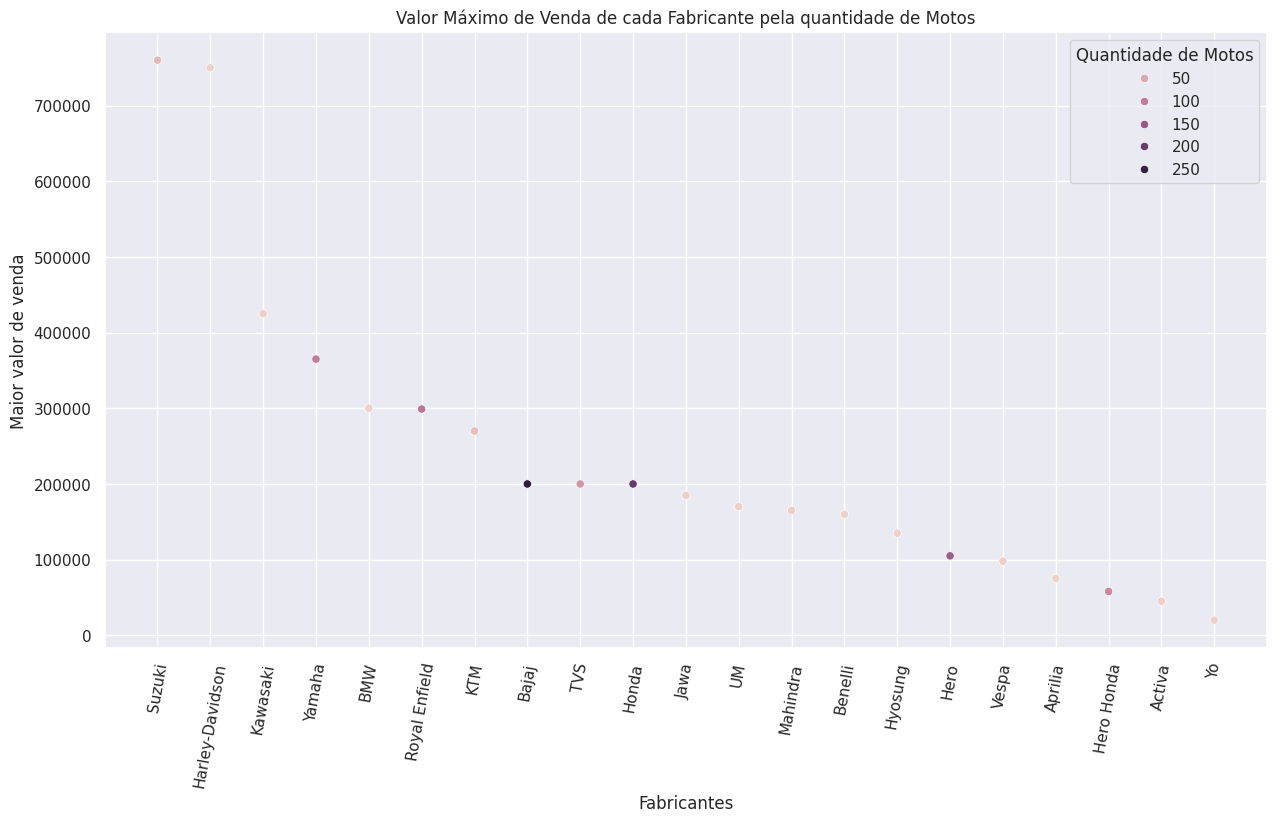

In [71]:
ax = sns.scatterplot(
    data = df_grouped, 
    x = 'company', 
    y = 'max_selling_price', 
    hue='quantity', 
)

ax = ax.set(
    title='Valor Máximo de Venda de cada Fabricante pela quantidade de Motos',
    xlabel='Fabricantes',
    ylabel='Maior valor de venda',
)

plt.xticks(rotation = 80)
plt.legend(title='Quantidade de Motos', loc='upper right');

Como podemos observar, o fabricante que possui a moto mais cara na base de dados não é o fabricante que possui a menor quantidade de motos.

#### 6. Qual o fabricante que possui a menor variação de valor de venda?

##### Planejamento

**Passos:**
1. Vamos agrupar os dados pela coluna de fabricante
2. Calcular a média do preço de venda
3. Calcular o desvio padrão do preço de venda
4. Verificar qual fabricante possui o maior valor de desvio
5. Utilizar a função `agg` do pacote Pandas para fazer os cálculos.

##### Resposta

In [72]:
df_grouped = df1[['selling_price', 'company']].groupby('company')

df_grouped = df_grouped.agg(
    std = pd.NamedAgg('selling_price', 'std'),
    mean = pd.NamedAgg('selling_price', 'mean'),
)

df_grouped = df_grouped.reset_index().sort_values('std').dropna()

df_grouped.head()

,company,std,mean
1,Aprilia,7071.067812,70000.000000
7,Hero Honda,11006.019774,24525.000000
10,Jawa,13228.756555,175000.000000
0,Activa,14933.184523,34000.000000
17,UM,15275.252317,156666.666667


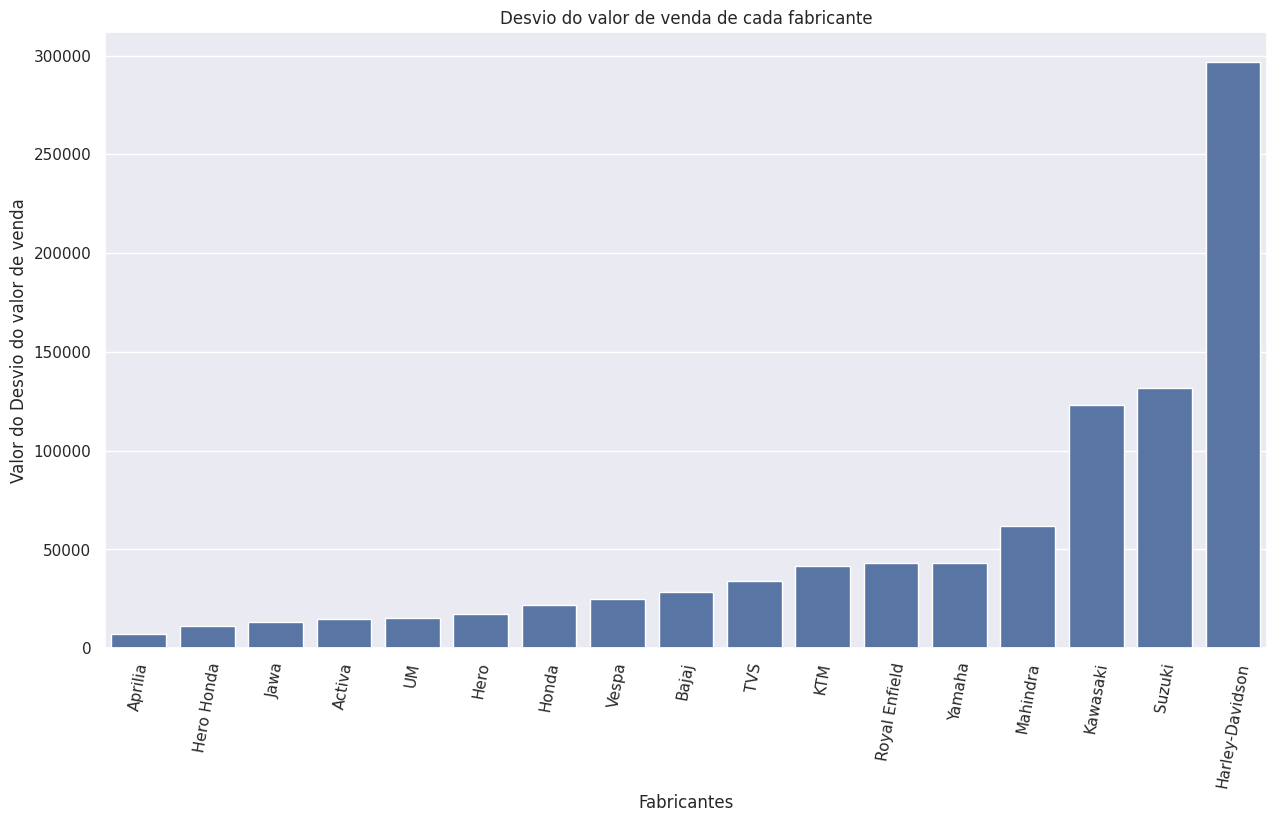

In [73]:
ax = sns.barplot(
    data = df_grouped, 
    x = 'company', 
    y = 'std', 
)

ax = ax.set(
    title='Desvio do valor de venda de cada fabricante',
    xlabel='Fabricantes',
    ylabel='Valor do Desvio do valor de venda',
)

plt.xticks(rotation = 80);

#### 7. Quais motos eu devo comprar?

Leve em conta que eu desejo motos com no máximo 3 anos de uso; no máximo 40 mil quilometros rodados; que sejam de um único dono; que estejam sendo vendidas por possoas físicas e que tenham o valor pretendido de venda menor que o valor do showroom. Envie um relatório contendo o modelo, preço de venda, quilometro rodado e ano, ordenado por valor de venda de forma decrescente para o meu e-mail.

##### Planejamento

**Passos:**
1. Selecionar somente as motos com no máximo 3 anos de uso
2. Selecionar somente as motos com no máximo 40 mil quilometros rodados
3. Selecionar somente vendedores que sejam pessoa física
4. A motdeve possuir o valor de venda menor que o valor da venda menos impostos (coluns `showroom ex`)

##### Resposta

In [74]:
year = (df1['year'] >= 2018)
km_rodado = (df1['km_driven'] <= 40000)
donos = (df1['owner'] == '1st owner')
vendedor = (df1['seller_type'] == 'Individual')
venda = (df1['selling_price'] < df1['ex_showroom_price'])

In [75]:
columns = ['id', 'name', 'selling_price', 'km_driven', 'year']

In [76]:
df_selected = df1.loc[ 
    year & km_rodado & donos & vendedor & venda,
    columns
].sort_values('selling_price', ascending = False)

df_selected.head()

,id,name,selling_price,km_driven,year
344,344,G310GS,300000.0,2500,2018
588,588,CBR-250R,200000.0,5500,2019
865,865,Thunderbird 500X,185000.0,1500,2018
960,960,Thunder 500,175000.0,3000,2018
961,961,Renegade Mojave,170000.0,1400,2019


In [77]:
df_selected.to_excel('../data/exported/bikes.xlsx', index = False)